### Logistic Regression - 2 Classes

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to read data and get features and labels
# arguments: filename
# return values: features and labels numpy arrays
def readData (file):
    data = pd.read_csv (file)
    features = data.iloc [:, 2: -1].values
    labels = data.iloc [:, -1].values
    return features, labels

In [3]:
# function to normalize data
# arguments: data
# return values: normalized data
def normalize (data):
    mins = np.min (data, axis = 0)
    maxs = np.max (data, axis = 0)
    return (data - mins)/ (maxs- mins)

In [4]:
# function to add a column at the end - bias
# arguments: data
# return values: data with an extra column of ones for bias
def addColumn (data):
    print (data.shape [0])
    return np.append (data, np.ones ((data.shape [0], 1)), axis = 1)

In [5]:
# forward pass
# arguments: features, weights matrix - last term is bias
# return values: X * weights
def forwardPass (weights, X):
    return sigmoid (np.dot (X, weights))

In [6]:
# sigmoid of a value
# arguments: matrix
# return values: sigmoid of the matrix
def sigmoid (X):
    return (1/ (1 + np.exp (-X)))

In [7]:
# cost function - log loss
# arguments: predicted values of y, actual y
# return values: cost
def costCalculator (yhat, Y):
    return (1/ len (Y)) * (np.dot (-Y, np.log (yhat)) - np.dot ((1 - Y), np.log (1 - yhat)))

In [8]:
def gradientDescent (X, Y, learningRate = 0.03, iterations = 50000):
    weights = np.zeros (X.shape [1])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (weights, X)
        costs.append (costCalculator (yhat, Y))
        weights = weights - ((learningRate/ (len (Y))) * (np.dot (X.T, yhat - Y)))
    return weights, costs

In [9]:
X, Y = readData ('./Data/Social_Network_Ads.csv')

In [10]:
Xnorm = normalize (X)
Xnorm = addColumn (Xnorm)

400


In [11]:
weights, costs = gradientDescent (Xnorm, Y)

Text(0,0.5,'Cost')

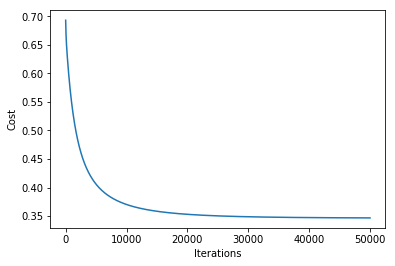

In [12]:
# plot the cost vs iteration# plot  
plt.plot (range (50000), costs)
plt.xlabel ('Iterations')
plt.ylabel ('Cost')

In [13]:
# last value is the bias
print  ("Weights: "  + str (weights))

Weights: [ 9.21147687  4.54268349 -7.24213143]


In [14]:
# predict classes on the training set
predictedValues = forwardPass (weights, Xnorm)
predictedClasses = [0 if x <= 0.5 else 1 for x in predictedValues]

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = confusion_matrix (predictedClasses, Y)

In [17]:
cm

array([[237,  43],
       [ 20, 100]], dtype=int64)

#### 2. Scikit-learn - verify our model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression ()

In [20]:
clf.fit (Xnorm, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions = clf.predict (Xnorm)

In [22]:
cm = confusion_matrix (predictions, Y)

In [23]:
cm

array([[242,  52],
       [ 15,  91]], dtype=int64)